FastText is a popular open-source library for efficient text representation and classification developed by Facebook's AI Research (FAIR) lab. It was first introduced by Armand Joulin, Edouard Grave, Piotr Bojanowski, and Tomas Mikolov in 2016. The library is designed to work with text data and provides tools for word embeddings, text classification, and text representation.

Here are some key features of FastText:

1. Word embeddings: FastText is primarily known for its word embedding capabilities. It represents words as continuous-valued vectors, also known as word embeddings, which capture the semantic meaning of words based on their context in a large corpus of text. These embeddings can be used to find word similarities or as input to various machine learning models.

2. Subword embeddings: One distinctive feature of FastText is its ability to handle subword information. Instead of representing words as single entities, FastText breaks them down into smaller subword units, such as character n-grams. This is particularly useful for handling out-of-vocabulary words and morphologically rich languages.

3. Text classification: FastText provides an efficient and straightforward way to perform text classification tasks. It uses the bag-of-words model along with the word embeddings to represent the text and then trains a classifier (typically using a softmax layer) to predict the class label.

4. Language identification: Another application of FastText is language identification. Given a piece of text, FastText can determine the language in which the text is written.

5. Speed and efficiency: As the name suggests, FastText is designed for speed and efficiency. It uses techniques like hierarchical softmax and quantization to reduce the memory and computation requirements, making it feasible to train on large datasets quickly.

6. Pre-trained models: FastText provides pre-trained word embeddings on various languages, which can be useful for transfer learning tasks, especially when working with languages with limited training data.

Overall, FastText is widely used in natural language processing (NLP) tasks, including text classification, sentiment analysis, machine translation, and more. It's particularly well-suited for scenarios where training data is large and computational resources are limited. The library is implemented in C++ and comes with interfaces for Python and other programming languages, making it accessible to developers from different backgrounds.

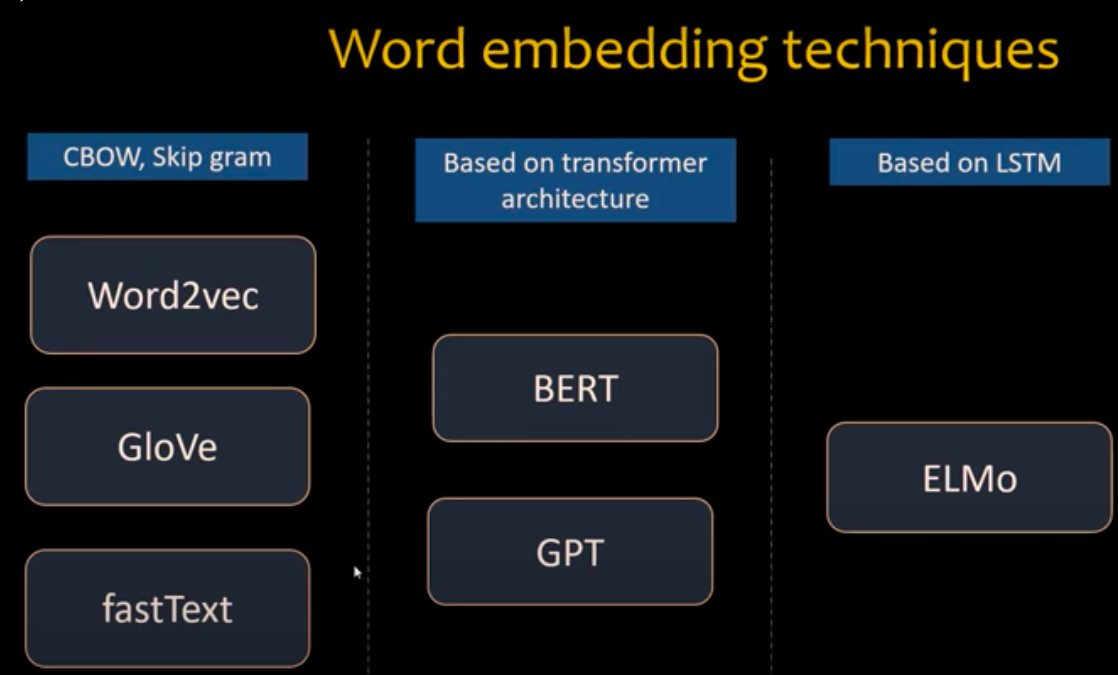

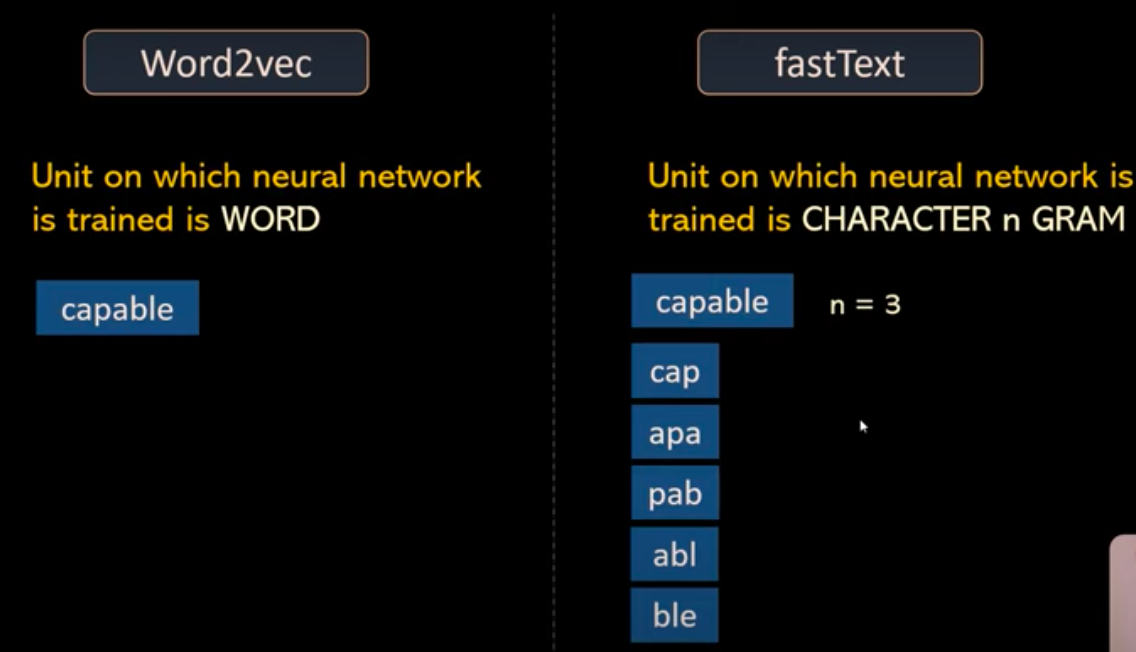

- fastText can solve the problem of OOV as it takes fractions of any word.
- For ex- it will take parts of capable (n=3)
- So if it encounters word capability it will not take it as OOV as part of it is in word capable and part of it can be taken rom other words as well.

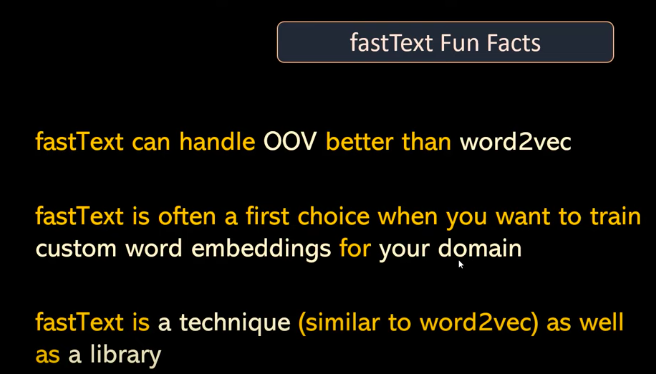

- Here custom embeddings mean document related to any specific domain like medical or insurance.
- SO instaed of taking generic dataset like wikipedia we will take fastText.
- fastText is light weight and takes less memory.

# Download and explore pre-trained models

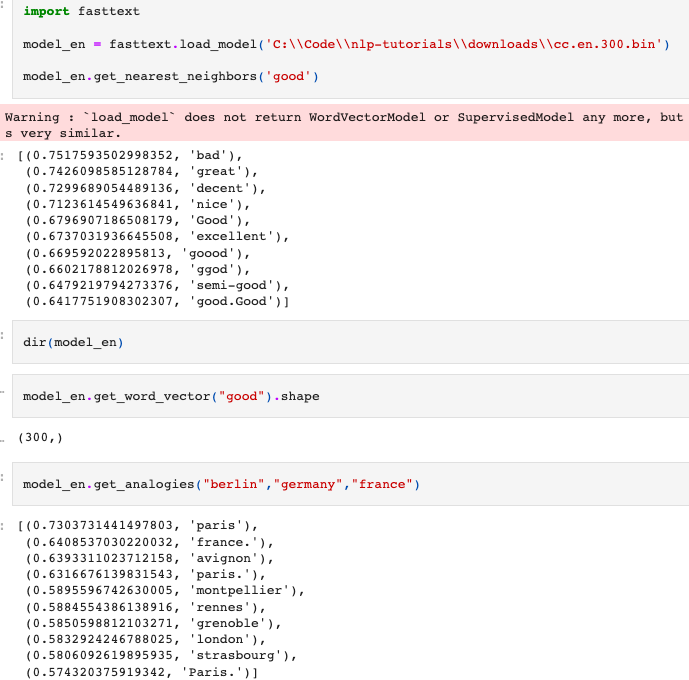

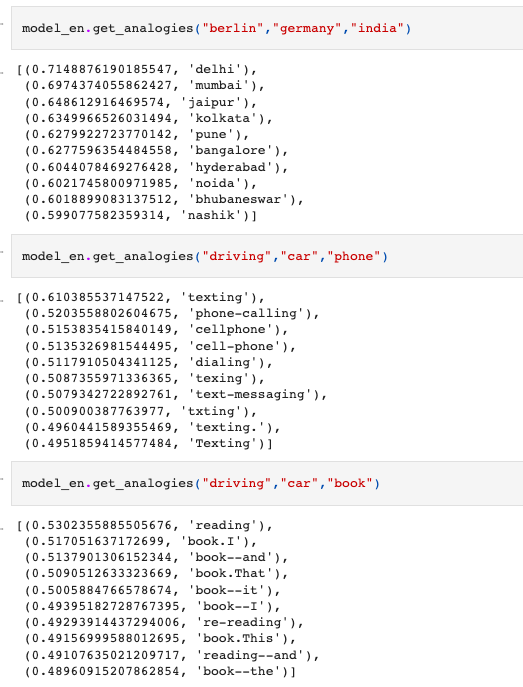

#Custom train word embeddings on indian food receipes 😋

dataset credits: https://www.kaggle.com/datasets/sooryaprakash12/cleaned-indian-recipes-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df =pd.read_csv("/content/drive/MyDrive/CodeBasics/NLP/Cleaned_Indian_Food_Dataset.csv")
df.head()

,TranslatedRecipeName,TranslatedIngredients,TotalTimeInMins,Cuisine,TranslatedInstructions,URL,Cleaned-Ingredients,image-url,Ingredient-count
0,Masala Karela Recipe,"1 tablespoon Red Chilli powder,3 tablespoon Gr...",45,Indian,"To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...,"salt,amchur (dry mango powder),karela (bitter ...",https://www.archanaskitchen.com/images/archana...,10
1,Spicy Tomato Rice (Recipe),"2 teaspoon cashew - or peanuts, 1/2 Teaspoon ...",15,South Indian Recipes,"To make tomato puliogere, first cut the tomato...",https://www.archanaskitchen.com/spicy-tomato-r...,"tomato,salt,chickpea lentils,green chilli,rice...",https://www.archanaskitchen.com/images/archana...,12
2,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1 Onion - sliced,1 teaspoon White Urad Dal (Sp...",50,South Indian Recipes,"To begin making the Ragi Vermicelli Recipe, fi...",https://www.archanaskitchen.com/ragi-vermicell...,"salt,rice vermicelli noodles (thin),asafoetida...",https://www.archanaskitchen.com/images/archana...,12
3,Gongura Chicken Curry Recipe - Andhra Style Go...,"1/2 teaspoon Turmeric powder (Haldi),1 tablesp...",45,Andhra,To begin making Gongura Chicken Curry Recipe f...,https://www.archanaskitchen.com/gongura-chicke...,"tomato,salt,ginger,sorrel leaves (gongura),fen...",https://www.archanaskitchen.com/images/archana...,15
4,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"oil - as per use, 1 tablespoon coriander seed...",30,Andhra,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...,"tomato,salt,ginger,red chillies,curry,asafoeti...",https://www.archanaskitchen.com/images/archana...,12


In [ ]:
df.TranslatedInstructions[0]

'To begin making the Masala Karela Recipe,de-seed the karela and slice.\nDo not remove the skin as the skin has all the nutrients.\nAdd the karela to the pressure cooker with 3 tablespoon of water, salt and turmeric powder and pressure cook for three whistles.\nRelease the pressure immediately and open the lids.\nKeep aside.Heat oil in a heavy bottomed pan or a kadhai.\nAdd cumin seeds and let it sizzle.Once the cumin seeds have sizzled, add onions and saute them till it turns golden brown in color.Add the karela, red chilli powder, amchur powder, coriander powder and besan.\nStir to combine the masalas into the karela.Drizzle a little extra oil on the top and mix again.\nCover the pan and simmer Masala Karela stirring occasionally until everything comes together well.\nTurn off the heat.Transfer Masala Karela into a serving bowl and serve.Serve Masala Karela along with Panchmel Dal and Phulka for a weekday meal with your family.\n'

- When we see Translated Instructions we see a lot of \n and special characters
- So we need to remove it using regex

In [ ]:
import re

text = 'To begin making the Masala Karela Recipe,de-seed the karela and slice.\nDo not remove the skin as the skin has all the nutrients.\nAdd the karela to the pressure cooker with 3 tablespoon of water, salt and turmeric powder and pressure cook for three whistles.\nRelease the pressure immediately and open the lids.\nKeep aside.Heat oil in a heavy bottomed pan or a kadhai.\nAdd cumin seeds and let it sizzle.Once the cumin seeds have sizzled, add onions and saute them till it turns golden brown in color.Add the karela, red chilli powder, amchur powder, coriander powder and besan.\nStir to combine the masalas into the karela.Drizzle a little extra oil on the top and mix again.\nCover the pan and simmer Masala Karela stirring occasionally until everything comes together well.\nTurn off the heat.Transfer Masala Karela into a serving bowl and serve.Serve Masala Karela along with Panchmel Dal and Phulka for a weekday meal with your family.\n'

re.sub(r"[^\w\s]", " ", text, flags=re.MULTILINE)

'To begin making the Masala Karela Recipe de seed the karela and slice \nDo not remove the skin as the skin has all the nutrients \nAdd the karela to the pressure cooker with 3 tablespoon of water  salt and turmeric powder and pressure cook for three whistles \nRelease the pressure immediately and open the lids \nKeep aside Heat oil in a heavy bottomed pan or a kadhai \nAdd cumin seeds and let it sizzle Once the cumin seeds have sizzled  add onions and saute them till it turns golden brown in color Add the karela  red chilli powder  amchur powder  coriander powder and besan \nStir to combine the masalas into the karela Drizzle a little extra oil on the top and mix again \nCover the pan and simmer Masala Karela stirring occasionally until everything comes together well \nTurn off the heat Transfer Masala Karela into a serving bowl and serve Serve Masala Karela along with Panchmel Dal and Phulka for a weekday meal with your family \n'

In [ ]:
def preprocess(text):
    text = re.sub(r'[^\w\s\']',' ', text)
    text = re.sub(r'[ \n]+', ' ', text)
    return text.strip().lower()

In [ ]:
preprocess(text)

'to begin making the masala karela recipe de seed the karela and slice do not remove the skin as the skin has all the nutrients add the karela to the pressure cooker with 3 tablespoon of water salt and turmeric powder and pressure cook for three whistles release the pressure immediately and open the lids keep aside heat oil in a heavy bottomed pan or a kadhai add cumin seeds and let it sizzle once the cumin seeds have sizzled add onions and saute them till it turns golden brown in color add the karela red chilli powder amchur powder coriander powder and besan stir to combine the masalas into the karela drizzle a little extra oil on the top and mix again cover the pan and simmer masala karela stirring occasionally until everything comes together well turn off the heat transfer masala karela into a serving bowl and serve serve masala karela along with panchmel dal and phulka for a weekday meal with your family'

In [ ]:
df.TranslatedInstructions=df.TranslatedInstructions.map(preprocess)

In [ ]:
df.TranslatedInstructions[0]

'to begin making the masala karela recipe de seed the karela and slice do not remove the skin as the skin has all the nutrients add the karela to the pressure cooker with 3 tablespoon of water salt and turmeric powder and pressure cook for three whistles release the pressure immediately and open the lids keep aside heat oil in a heavy bottomed pan or a kadhai add cumin seeds and let it sizzle once the cumin seeds have sizzled add onions and saute them till it turns golden brown in color add the karela red chilli powder amchur powder coriander powder and besan stir to combine the masalas into the karela drizzle a little extra oil on the top and mix again cover the pan and simmer masala karela stirring occasionally until everything comes together well turn off the heat transfer masala karela into a serving bowl and serve serve masala karela along with panchmel dal and phulka for a weekday meal with your family'

In [ ]:
!git clone https://github.com/facebookresearch/fastText.git
!cd fastText
!pip install fastText
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
model = fasttext.load_model('cc.en.300.bin')

Cloning into 'fastText'...
remote: Enumerating objects: 3946, done.
remote: Counting objects: 100% (974/974), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 3946 (delta 872), reused 831 (delta 820), pack-reused 2972
Receiving objects: 100% (3946/3946), 8.25 MiB | 19.30 MiB/s, done.
Resolving deltas: 100% (2510/2510), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.0-py3-none-any.whl (227 kB)
  Created wheel for fastText: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4479747 sha256=a03589c845fa4ee2a7577bcdbbd1ed56d1e40dfe5ac55fd77ab127b7acf67d7a
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fastText


- Converting the original receipe into csv file of preprocessed TranslatedInstructions

In [ ]:
df.to_csv('food_receipes.txt',columns=["TranslatedInstructions"],header=False,index=False)

In [ ]:
import fasttext

model = fasttext.train_unsupervised("/content/food_receipes.txt")

- fastText is an unsupervised traning model.
- so it will create target words like to tofu with "salad" and "with"

In [ ]:
model.get_nearest_neighbors("paneer")

[(0.7046746611595154, 'tikka'),
 (0.6630706191062927, 'tikkas'),
 (0.6622522473335266, 'tandoori'),
 (0.6518504619598389, 'bhurji'),
 (0.6466901302337646, 'reshmi'),
 (0.6369193196296692, 'nawabi'),
 (0.6190375685691833, 'makhanwala'),
 (0.6179590821266174, 'hariyali'),
 (0.6143130660057068, 'makhani'),
 (0.5987952351570129, 'malai')]

In [ ]:
model.get_nearest_neighbors("dosa")


[(0.8473756909370422, 'dosai'),
 (0.8177902698516846, 'dosas'),
 (0.7941131591796875, "dosa's"),
 (0.7563254237174988, 'uthappam'),
 (0.7445687055587769, 'uttapam'),
 (0.7228896021842957, 'kanchipuram'),
 (0.7157869338989258, 'dose'),
 (0.7090448141098022, 'neer'),
 (0.7085314393043518, 'pesarattu'),
 (0.7060192227363586, 'chembaruthi')]

In [ ]:
model.get_word_vector("dosa").shape

(100,)

https://fasttext.cc/docs/en/unsupervised-tutorial.html for details on parameters in train_unsupervised function. Based on the need one can use following parameters for fine tunning,

epochs = Default value is 5. Epoch is how many times it will loop over the same dataset for the training
lr = Learning rate
thread = Number of threads for the training

# Text Classification Using FastText

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CodeBasics/NLP/ecommerce_dataset.csv",header=None,names=["category","description"])
print(df.shape)
df.head()

(50425, 2)


,category,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [ ]:
df.category.value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: category, dtype: int64

In [ ]:
df.dropna(inplace=True)
df.shape

(50424, 2)

In [ ]:
df.category.replace("Clothing & Accessories","Clothing_Accessories",inplace=True)
df.category.unique()

array(['Household', 'Books', 'Clothing_Accessories', 'Electronics'],
      dtype=object)

- When you train a fasttext model, it expects labels to be specified with label prefix.
- We will just create a third column in the dataframe that has label as well as the product description

In [ ]:
df['category']="__label__"+df['category'].astype(str)
df.head()

,category,description
0,__label__Household,Paper Plane Design Framed Wall Hanging Motivat...
1,__label__Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,__label__Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,__label__Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,__label__Household,Incredible Gifts India Wooden Happy Birthday U...


- Combining category column with description model to create another column

In [ ]:
df['category_description']=df['category']+' '+df['description']
df.head()

,category,description,category_description
0,__label__Household,Paper Plane Design Framed Wall Hanging Motivat...,__label__Household Paper Plane Design Framed W...
1,__label__Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",__label__Household SAF 'Floral' Framed Paintin...
2,__label__Household,SAF 'UV Textured Modern Art Print Framed' Pain...,__label__Household SAF 'UV Textured Modern Art...
3,__label__Household,"SAF Flower Print Framed Painting (Synthetic, 1...",__label__Household SAF Flower Print Framed Pai...
4,__label__Household,Incredible Gifts India Wooden Happy Birthday U...,__label__Household Incredible Gifts India Wood...


##Pre-procesing

- Remove punctuation
- Remove extra space
- Make the entire sentence lower case

In [ ]:
df['category_description'][0]

'__label__Household Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and so

- Trying fastext on random text to remove all the special characters

In [ ]:
import re

text = "  VIKI's | Bookcase/Bookshelf (3-Shelf/Shelve, White) | ? . hi"

text=re.sub(r'[^\w\s\']',' ',text)

- Let's replace multiple spaces with one space

In [ ]:
text = re.sub(' +', ' ', text)
text.strip().lower()

"viki's bookcase bookshelf 3 shelf shelve white hi"

In [ ]:
def preprocess(text):
    text = re.sub(r'[^\w\s\']',' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip().lower()

- calling the preprocess function category_description column

In [ ]:
df['category_description']=df['category_description'].map(preprocess)
df.head()

,category,description,category_description
0,__label__Household,Paper Plane Design Framed Wall Hanging Motivat...,__label__household paper plane design framed w...
1,__label__Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",__label__household saf 'floral' framed paintin...
2,__label__Household,SAF 'UV Textured Modern Art Print Framed' Pain...,__label__household saf 'uv textured modern art...
3,__label__Household,"SAF Flower Print Framed Painting (Synthetic, 1...",__label__household saf flower print framed pai...
4,__label__Household,Incredible Gifts India Wooden Happy Birthday U...,__label__household incredible gifts india wood...


In [ ]:
df['category_description'][0]

'__label__household paper plane design framed wall hanging motivational office decor art prints 8 7 x 8 7 inch set of 4 painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it this is an special series of paintings which makes your wall very beautiful and gives a royal touch this painting is ready to hang you would be proud to possess this unique painting that is a niche apart we use only the most modern and efficient printing technology on our prints with only the and inks and precision epson roland and hp printers this innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime we print solely with top notch 100 inks to achieve brilliant and true colours due to their high level of uv resistance our prints retain their beautiful colours for many years add colour and style to your living space with this digitally printed painting some are for pleasure and some for eternal bli

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [ ]:
train.shape,test.shape

((40339, 3), (10085, 3))

In [ ]:
train.head()

In [ ]:
test.head()

,category,description,category_description
24935,__label__Books,"Transportation Engineering, Vol. 2: Railways, ...",__label__books transportation engineering vol ...
14955,__label__Household,Haier 190 L 3 Star Direct Cool Single Door Ref...,__label__household haier 190 l 3 star direct c...
24262,__label__Books,"The God Delusion Review ""You needn't buy the t...",__label__books the god delusion review you nee...
2357,__label__Household,VK Furniture Sheesham Wood Console Table for L...,__label__household vk furniture sheesham wood ...
46894,__label__Electronics,Sony AE SEL55210 55-210 mm F4.5-6.3 Telephoto ...,__label__electronics sony ae sel55210 55 210 m...


In [ ]:
train.to_csv("ecommerce.train",columns=['category_description'],index=False, header=False)
test.to_csv("ecommerce.test",columns=['category_description'],index=False, header=False)


- It's creating an model with the training data and also has word embeddings with it.

In [ ]:
import fasttext

model=fasttext.train_supervised(input="ecommerce.train")
model.test("ecommerce.test")

(10085, 0.9695587506197323, 0.9695587506197323)

First parameter (10084) is test size. Second and third parameters are precision and recall respectively. You can see we are getting around 96% precision which is pretty good

## Now let's do prediction for few product descriptions

In [ ]:
model.predict("wintech assemble desktop pc cpu 500 gb sata hdd 4 gb ram intel c2d processor 3")

(('__label__electronics',), array([0.99398887]))

In [ ]:
model.predict("ockey men's cotton t shirt fabric details 80 cotton 20 polyester super combed cotton rich fabric")

(('__label__clothing_accessories',), array([1.00001001]))

In [ ]:
model.predict("think and grow rich deluxe edition")

(('__label__books',), array([1.00000989]))

In [ ]:
model.get_nearest_neighbors("painting")


[(0.998849630355835, 'delli\xa02'),
 (0.9988455176353455, 'olrada'),
 (0.9988436698913574, '2qts'),
 (0.9988436698913574, 'bpafree'),
 (0.9988375902175903, 'unpeeled'),
 (0.9988346099853516, 'tnc'),
 (0.9988303780555725, 'freshens'),
 (0.9988296627998352, 'pureeing'),
 (0.9988189935684204, 'laest'),
 (0.9988187551498413, 'widths')]

In [ ]:
model.get_nearest_neighbors("sony")

[(0.9993828535079956, 'e20'),
 (0.9993799924850464, 'fogproof'),
 (0.9993782043457031, 'fe960p'),
 (0.9993782043457031, 'zv'),
 (0.9993782043457031, '154mm'),
 (0.9993782043457031, 'tranditional'),
 (0.9993614554405212, 'fo'),
 (0.999360203742981, 'p1'),
 (0.999360203742981, 'r9s'),
 (0.999360203742981, 'm3s')]

In [ ]:
model.get_nearest_neighbors("banglore")

[(0.0, 'to'),
 (0.0, 'and'),
 (0.0, 'a'),
 (0.0, 'with'),
 (0.0, 'for'),
 (0.0, 'is'),
 (0.0, '</s>'),
 (0.0, 'audiencemeasures'),
 (0.0, 'obscuring'),
 (0.0, 'halligan')]